**GRADUATE ROTATIONAL INTERNSHIP PROGRAM**

**THE SPARKS FOUNDATION**

**NAME - VAISHALI**

# Task 2 - Prediction Using Unsupervised Machine Learning

# Problem Statement
 **From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually.**

# Approach ->"K-Means Clustering Algorithm"

K-Means is one of the simplest unsupervised learning algorithms.

It solves the well-known clustering problem. 

K-means clustering is a method of vector quantization, originally from signal processing.

It is popular for cluster analysis in data mining.

This algorithm divides the dataset into K clusters (clusters are divided on the basis of similarity amongst them)

**STEP1 - Import Libraries**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

**STEP2 - Loading Dataset**

In [4]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**STEP3 - Data Wrangling**

In [5]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**STEP4 - Checking for null values if exist**

In [6]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**The above step indicates that there exist no missing value in our dataset**

**STEP5 - Since I am using K means clustering approach ,lets find the optimum number of clusters for k-means classification**

In [11]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x)

KMeans(n_clusters=5)

In [12]:
y_kmeans = kmeans.predict(x)

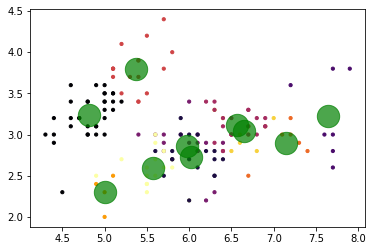

In [13]:
plt.scatter(x[:,0],x[:,1],c = y_kmeans,s=10,cmap = 'inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='green',s=500,alpha=0.7);

 **from the above plot we can clearly see that the optimum number of clusters can be either 2 or 3,So now we can take the help
   of Elbow Method to get the most suitable number** 

**Predicting Optimum number of clusters using "ELBOW METHOD"**

In [14]:
kmeans.inertia_

26.534529220779234

In [17]:
wcss = []# WITHIN CLUSTER SUM OF SQUARE

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(x)
    wcss.append([k,kmeans.inertia_])
    

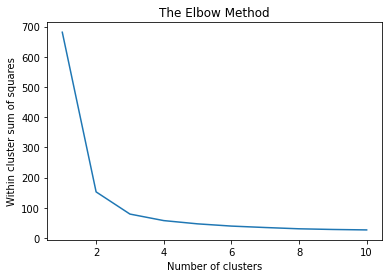

In [19]:
#plt.plot(range(1, 11), wcss)
plt.plot(pd.DataFrame(wcss)[0],pd.DataFrame(wcss)[1]);
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') # Within cluster sum of squares
plt.show()

**From the above graph its clear that 3 would be a better option over 2,for a better understanding of our conclusion lets try another method namely 
"Silhouette Analysis"**

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
wcss = []# WITHIN CLUSTER SUM OF SQUARE

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(x)
    wcss.append([k,silhouette_score(x,kmeans.labels_)])
    

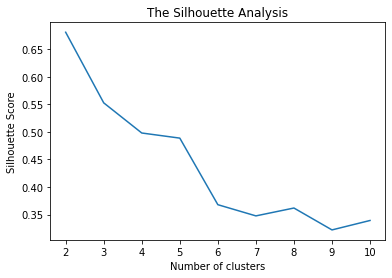

In [23]:
plt.plot(pd.DataFrame(wcss)[0],pd.DataFrame(wcss)[1]);
plt.title('The Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score') # Within cluster sum of squares
plt.show()

**Getting the insights of both the above methods(i.e "The Elbow Method & The Silhouette Analysis"),I have decided to choose 
optimum number of clusters as 3**

**Representing the Clusters Visually alongwith their centroids**

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Text(0.5, 1.0, 'Clusters with their centroids')

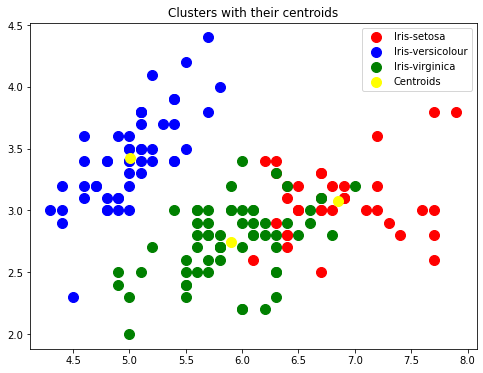

In [26]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.title("Clusters with their centroids")

# CONCLUSION
**From the analysis & implementation of K-Means Clustering algorithm we can conclude that for the given Iris dataset "the optimum number of clusters is 3" and we have successfully visualised this in above plot**